In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import HTML

In [2]:
disease = pd.read_csv("https://od.cdc.gov.tw/cdc/TCDCIntlEpidAll.csv")

## 查看資料

In [3]:
disease.head()

,sent,source,effective,expires,senderName,headline,description,instruction,web,alert_title,severity_level,alert_disease,areaDesc,areaDesc_EN,circle,ISO3166,areaDetail,ISO3166_2
0,2011-12-28T00:00:00+08:00,CDC,2011-12-28T00:00:00+08:00,2012-03-28T00:00:00+08:00,疾病管制署,美國─阪崎腸桿菌,美國密蘇里州近1個月有2名新生兒感染侵入性阪崎腸桿菌（Cronobacter sakazak...,NaN,http://www.cdc.gov.tw/professional/epidemicinf...,國際重要疫情資訊,NaN,NaN,美國,USA,"38.82,-100.54",US,NaN,NaN
1,2011-12-28T00:00:00+08:00,CDC,2011-12-28T00:00:00+08:00,2012-03-28T00:00:00+08:00,疾病管制署,俄羅斯─麻疹,俄羅斯24個地區今年共通報222例麻疹，其中Dagestan地區7-12月共確診68例。,NaN,http://www.cdc.gov.tw/professional/epidemicinf...,國際重要疫情資訊,NaN,麻疹,"俄羅斯,白俄羅斯","Russian Federation,Belarus","59.53,94.57","RU,BY",NaN,NaN
2,2011-12-28T00:00:00+08:00,CDC,2011-12-28T00:00:00+08:00,2012-03-28T00:00:00+08:00,疾病管制署,剛果民主共和國─霍亂,剛果民主共和國4個省份（P.Orientale、Equateur、Bandundu、Kins...,NaN,http://www.cdc.gov.tw/professional/epidemicinf...,國際重要疫情資訊,NaN,霍亂,剛果民主共和國,"Congo,Democratic Republic of the","-3.07,24.52",CD,NaN,NaN
3,2011-12-28T00:00:00+08:00,CDC,2011-12-28T00:00:00+08:00,2012-03-28T00:00:00+08:00,疾病管制署,蒲隆地─霍亂,"蒲隆地持續4個月的霍亂疫情已獲控制，累計1,100餘人感染，8例死亡。",NaN,http://www.cdc.gov.tw/professional/epidemicinf...,國際重要疫情資訊,NaN,霍亂,蒲隆地,Burundi,"-3.30,29.89",BI,NaN,NaN
4,2011-12-28T00:00:00+08:00,CDC,2011-12-28T00:00:00+08:00,2012-03-28T00:00:00+08:00,疾病管制署,印尼─愛滋病,澳洲衛生部於12/25接獲通報一例愛滋病毒感染者，疑似於印尼峇里島旅遊時經由刺青感染，目前正...,NaN,http://www.cdc.gov.tw/professional/epidemicinf...,國際重要疫情資訊,NaN,人類免疫缺乏病毒感染,印尼,Indonesia,"-4.39,122.95",ID,NaN,NaN


### 從資料中發現，可用"sent" column來判斷年份，並利用"headline" column中是否含"美國"來判斷美國個案

In [74]:
index = list(range(2009,2019))
case = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(disease["sent"])):
    if  ("2009" in disease["sent"][i]) and ("美國" in disease["headline"][i]) :
        case[0] += 1
    elif ("2010" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[1] += 1
    elif ("2011" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[2] += 1
    elif ("2012" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[3] += 1
    elif ("2013" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[4] += 1
    elif ("2014" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[5] += 1
    elif ("2015" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[6] += 1
    elif ("2016" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[7] += 1
    elif ("2017" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[8] += 1
    elif ("2018" in disease["sent"][i]) and ("美國" in disease["headline"][i]):
        case[9] += 1
    

## 展示2009年到2018年美國重要病例數的表格

In [77]:
display(pd.DataFrame(case, index = index, columns = ['美國重要病例數']))

,美國重要病例數
2009,99
2010,89
2011,159
2012,222
2013,223
2014,235
2015,221
2016,170
2017,121
2018,82


## 對年份做折線圖

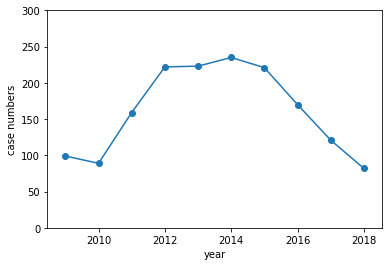

In [83]:
plt.plot(index,case)
plt.scatter(index,case)
plt.ylim(0,300)
plt.xlabel('year')
plt.ylabel('case numbers')
plt.show()